In [2]:
import pandas as pd
import glob
import os

# I recommend putting all the data in a folder called "data" so it fits with the gitignore file
path = 'data/OxWalk_Dec2022/Hip_25Hz'

all_files = glob.glob(os.path.join(path, "*.csv"))

dfs = []

for file in all_files:
    df = pd.read_csv(file,parse_dates=['timestamp'])
    df['source_file'] = os.path.basename(file)
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)


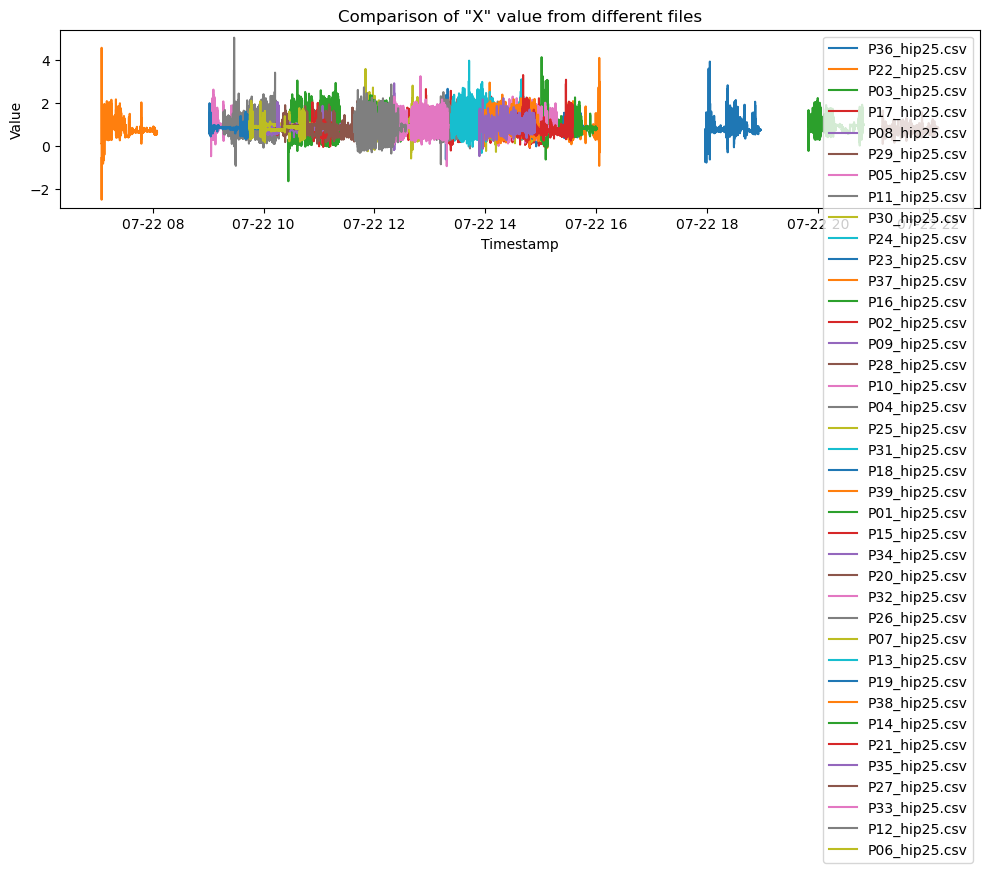

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for source in combined_df['source_file'].unique():
    temp_df = combined_df[combined_df['source_file'] == source]
    plt.plot(temp_df['timestamp'], temp_df['x'], label=source)

plt.title('Comparison of "X" value from different files')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
